In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


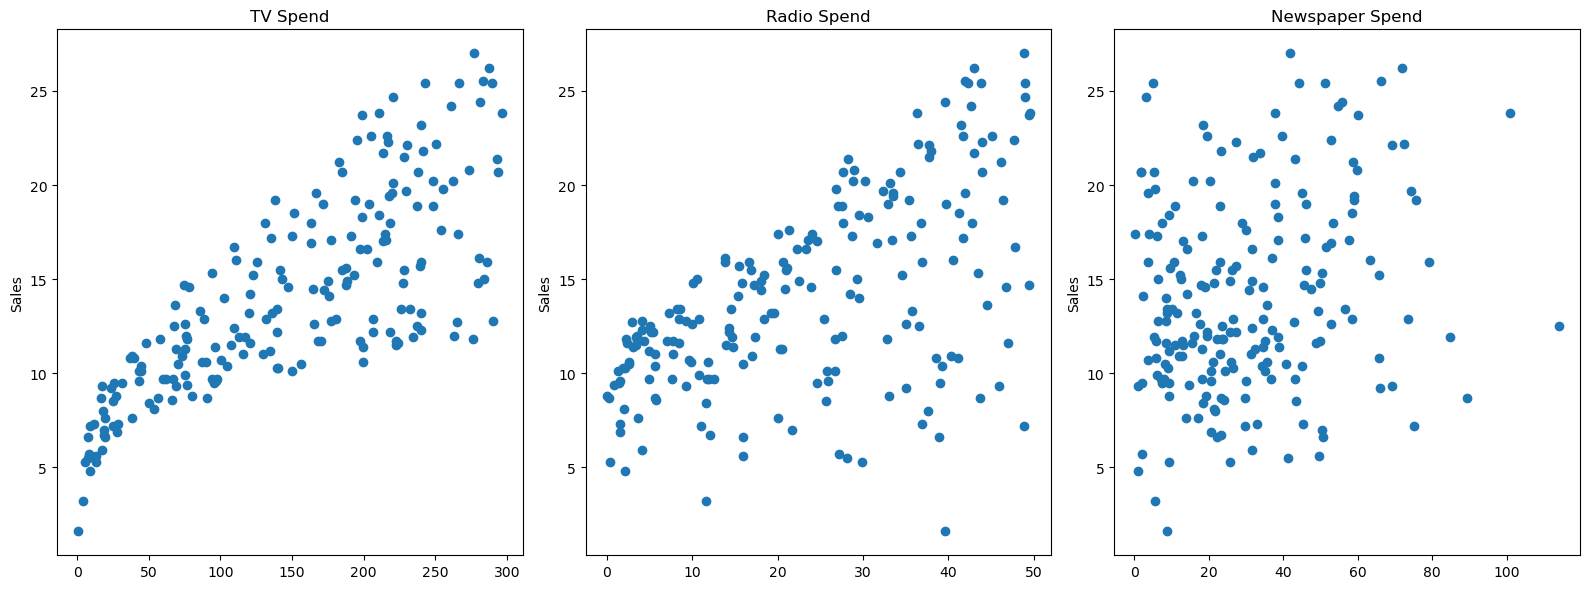

In [4]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axis[0].plot(df['TV'],df['sales'],'o')
axis[0].set_ylabel('Sales')
axis[0].set_title('TV Spend')

axis[1].plot(df['radio'],df['sales'],'o')
axis[1].set_ylabel('Sales')
axis[1].set_title('Radio Spend')

axis[2].plot(df['newspaper'],df['sales'],'o')
axis[2].set_ylabel('Sales')
axis[2].set_title('Newspaper Spend')
plt.tight_layout()

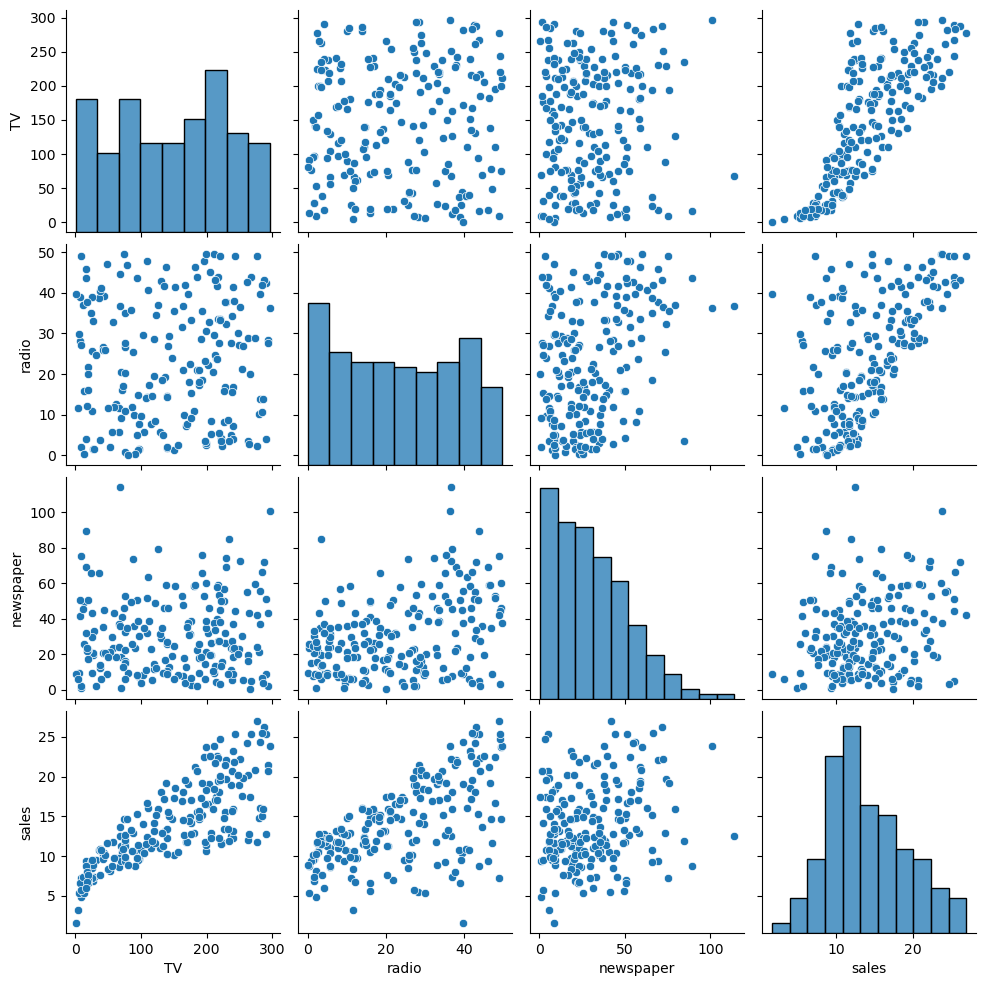

In [5]:
sns.pairplot(df)

In [11]:
X = df.drop('sales',axis=1)

In [12]:
#X

In [13]:
y = df['sales']

In [14]:
#y

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=101)

In [21]:
len(df) == len(X_train) + len(X_test)

True

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
df['sales'].mean()

14.022500000000003

In [30]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [32]:
# root mean square error
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993882

In [35]:
test_residuals = y_test - test_predictions

In [36]:
#test_residuals

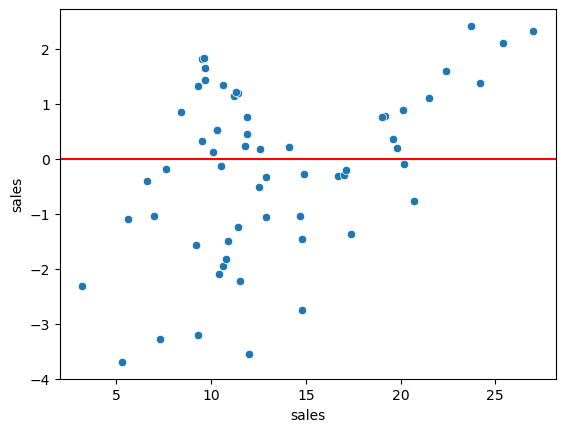

In [38]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')

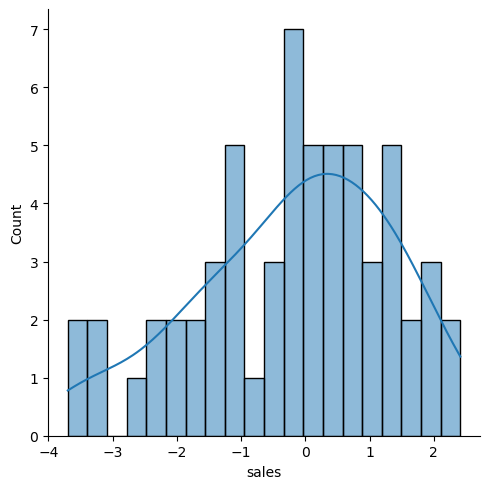

In [40]:
sns.displot(test_residuals,bins=20,kde=True)

In [41]:
import scipy as sp

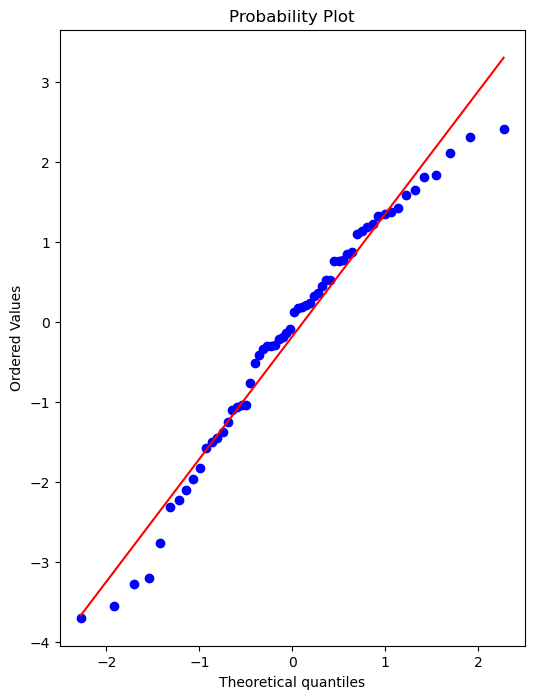

In [43]:
fig,ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [44]:
final_model = LinearRegression()

In [46]:
final_model.fit(X,y)

LinearRegression()

In [48]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
y_hat = final_model.predict(X)

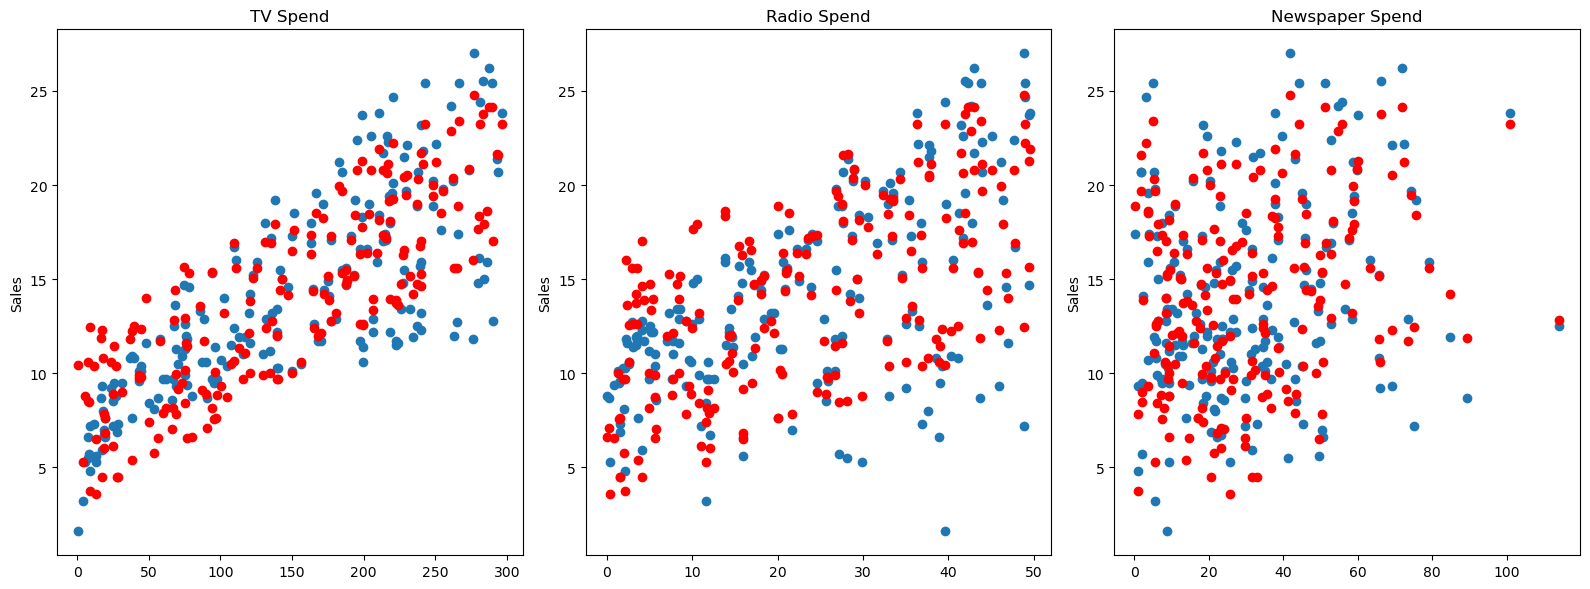

In [51]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axis[0].plot(df['TV'],df['sales'],'o')
axis[0].plot(df['TV'],y_hat,'o',color='red')
axis[0].set_ylabel('Sales')
axis[0].set_title('TV Spend')

axis[1].plot(df['radio'],df['sales'],'o')
axis[1].plot(df['radio'],y_hat,'o',color='red')
axis[1].set_ylabel('Sales')
axis[1].set_title('Radio Spend')

axis[2].plot(df['newspaper'],df['sales'],'o')
axis[2].plot(df['newspaper'],y_hat,'o',color='red')
axis[2].set_ylabel('Sales')
axis[2].set_title('Newspaper Spend')
plt.tight_layout()

In [52]:
from joblib import dump,load

In [53]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [54]:
loaded_model = load('final_sales_model.joblib')

In [55]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [58]:
# 149 on TV, 100 on Radio, 50 in Newspaper
campaign = [[149,22,12]]

In [59]:
loaded_model.predict(campaign)

C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])